In [1]:
import numpy as np
from skimage import io
from veg_index import Image_Multi
import matplotlib.pyplot as plt
from matplotlib import path
import matplotlib.patches as patches
import georasters as gr

from scipy import misc
import math
import scipy.ndimage.filters as filters
import scipy.ndimage as ndimage
import Utils
import cv2

/home/dlsaavedra/anaconda3/envs/new/lib/python3.7/site-packages/pysal/__init__.py:65: VisibleDeprecationWarning: PySAL's API will be changed on 2018-12-31. The last release made with this API is version 1.14.4. A preview of the next API version is provided in the `pysal` 2.0 prelease candidate. The API changes and a guide on how to change imports is provided at https://migrating.pysal.org
  ), VisibleDeprecationWarning)


# Load Image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[(504, 6), (6, 1406), (3706, 3105), (4381, 1460)]


<Figure size 432x288 with 0 Axes>

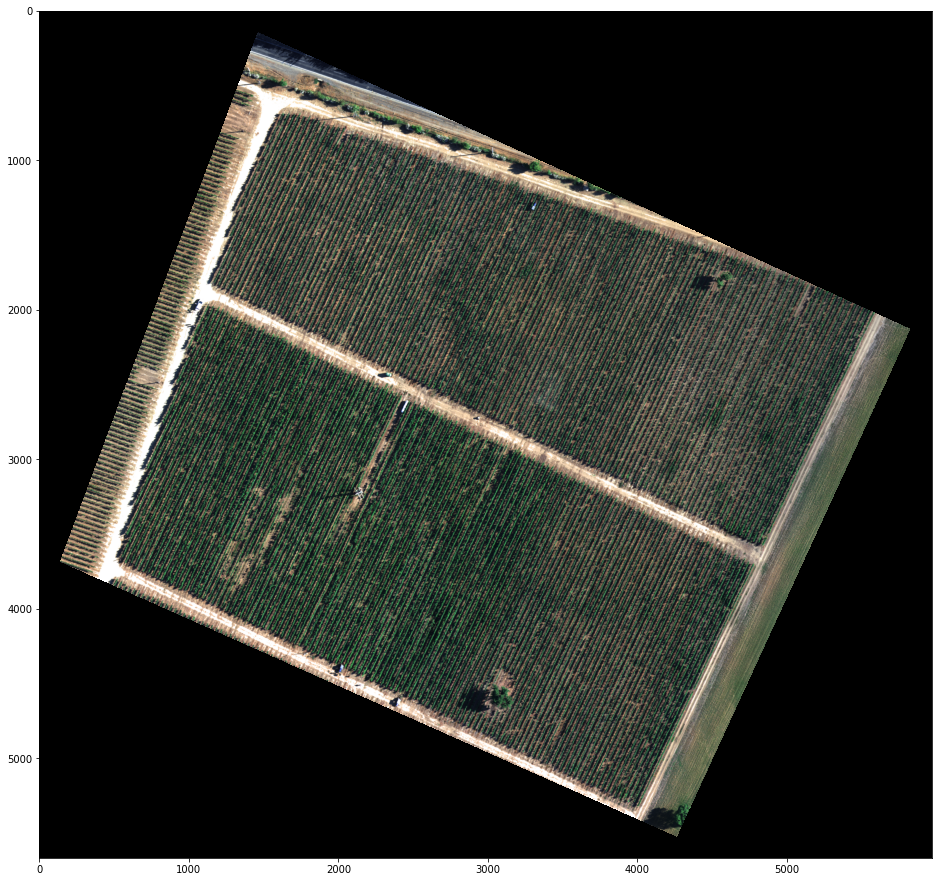

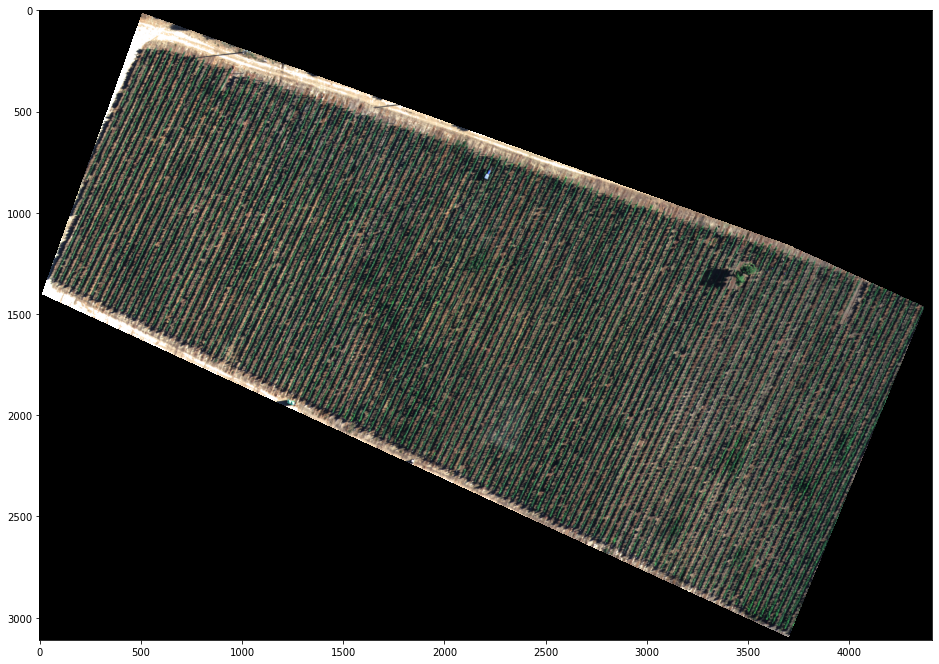

In [2]:
im_red_path = "Barrack A/result_Red.tif"
im_green_path = "Barrack A//result_Green.tif"
im_blue_path = "Barrack A/result_Blue.tif"
im_nir_path = "Barrack A/result_NIR.tif"
im_rededge_path = "Barrack A/result_RedEdge.tif"

im_multi = Image_Multi(im_red_path, im_green_path, im_blue_path, im_nir_path, im_rededge_path)

List_P = [(1600, 500),(4800, 3600), (1100, 1900), (5500, 1900)]
#List_P = [(500, 3700), (1000, 1900), (4900, 3500), (4000, 5500)]

im_multi_seg = im_multi.Segmentation(List_P)

plt.figure(0)
plt.figure(figsize=(16, 16))
plt.imshow(im_multi.RGB().raster)
plt.figure(1)
plt.figure(figsize=(16, 16))
plt.imshow(im_multi_seg.RGB().raster)
print(im_multi_seg.list_P)

# Transform Polygon to rectangle

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Matrix Transform: 
 [[ 1.15994431e+00  4.12608763e-01 -5.87087587e+02]
 [-4.23658394e-01  1.12965859e+00  2.06745879e+02]
 [ 5.09050097e-05  5.58463694e-06  1.00000000e+00]]
Dimension of Points matrix as input to Persepective transform 
(1, 4, 2)
Dimension of Points matrix as input to Persepective transform 
(1, 1, 2)
Transform Points of Polygon 
[[[ 0.0000000e+00  0.0000000e+00]
  [ 4.1400000e+03 -4.6170302e-14]
  [ 4.1400000e+03  1.7780000e+03]
  [ 0.0000000e+00  1.7780000e+03]]]
Inverse Transform of point (0,0)
[[[504.   6.]]]


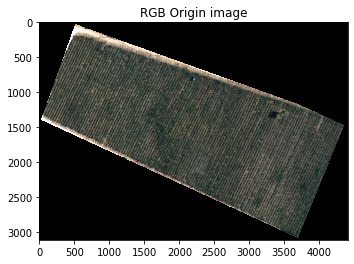

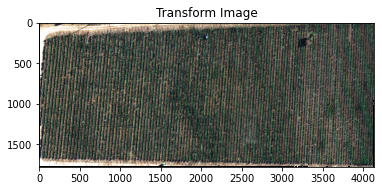

In [3]:
plt.figure(0)
plt.imshow(im_multi_seg.RGB().raster)
plt.title('RGB Origin image')

Points = np.array(im_multi_seg.list_P)
Points_order = Utils.order_points_rect(Points)

M, maxWidth, maxHeight = Utils.perspectiveTransform(Points)

warped = cv2.warpPerspective(im_multi_seg.RGB().raster, M, (maxWidth, maxHeight))

plt.figure(1)
plt.imshow(warped)
plt.title('Transform Image')
print("Matrix Transform: \n " + str(M))
print("Dimension of Points matrix as input to Persepective transform \n" + str((np.array([Points_order])).shape))
print("Dimension of Points matrix as input to Persepective transform \n" + str((np.array([[[0,0]]])).shape))
print("Transform Points of Polygon \n" + str(cv2.perspectiveTransform(np.expand_dims(Points_order, axis = 0), M)))
print("Inverse Transform of point (0,0)\n" + str(cv2.perspectiveTransform(np.expand_dims([[0.,0.]], axis = 0), np.linalg.inv(M))))

# Subidivision rectangel/polygon

20


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


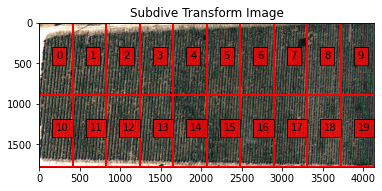

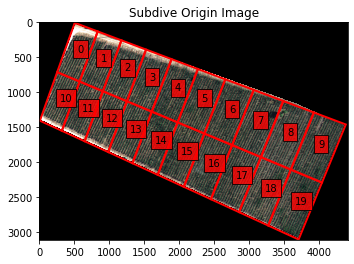

In [4]:
# top-left, top-right, bottom-right, and bottom-left
split_Weight, split_Height = 10, 2
sub_division = Utils.subdivision_rect([split_Weight, split_Height], maxWidth, maxHeight)

print(len(sub_division))

plt.figure(0)
plt.imshow(warped)
plt.title('Subdive Transform Image')
ax = plt.gca()

for i,Poly in enumerate(sub_division):
    poly = patches.Polygon(Poly,
                     linewidth=2,
                     edgecolor='red',
                     fill = False)
    plt.text(np.mean([x[0]  for x in sub_division[i]]), np.mean([y[1]  for y in sub_division[i]]) , str(i),  bbox=dict(facecolor='red', alpha=0.8))

    ax.add_patch(poly)

############## Subidive in Origin Image ################

sub_division_origin = cv2.perspectiveTransform(np.array(sub_division), np.linalg.inv(M))


plt.figure(1)
plt.imshow(im_multi_seg.RGB().raster)
plt.title('Subdive Origin Image')
ax = plt.gca()

for i,Poly in enumerate(sub_division_origin):
    poly = patches.Polygon(Poly,
                     linewidth=2,
                     edgecolor='red',
                     fill = False)
    plt.text(np.mean([x[0]  for x in sub_division_origin[i]]), np.mean([y[1]  for y in sub_division_origin[i]]) , str(i),  bbox=dict(facecolor='red', alpha=0.8))

    ax.add_patch(poly)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

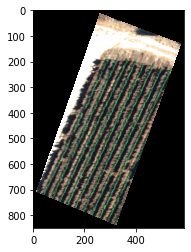

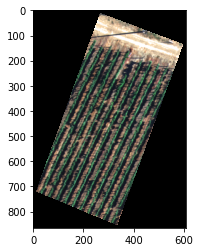

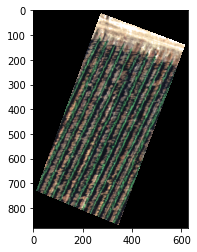

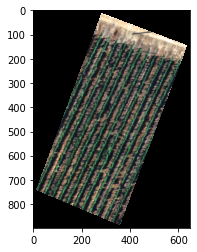

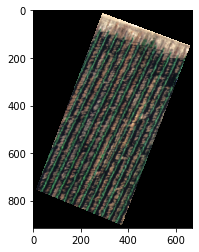

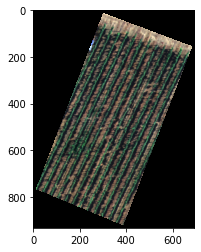

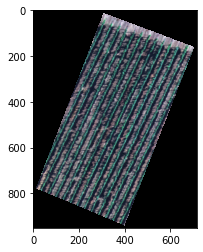

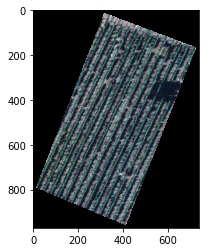

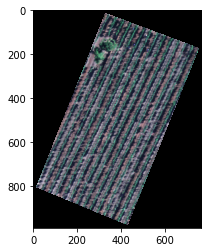

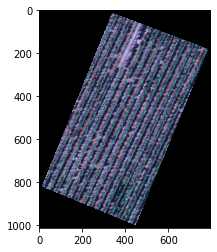

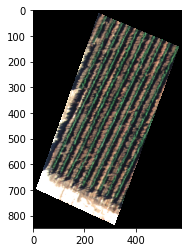

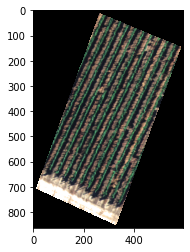

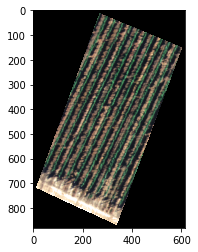

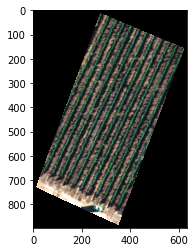

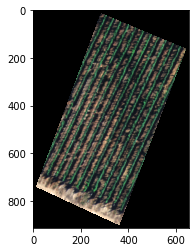

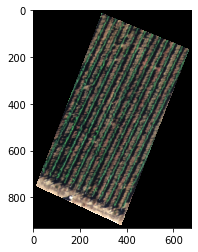

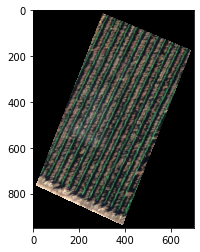

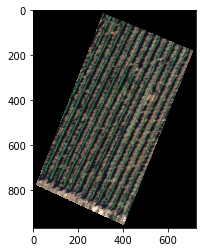

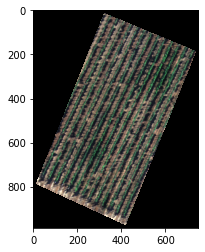

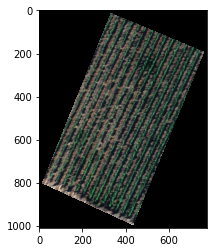

In [5]:
list_im_multi_divide = [im_multi_seg.Segmentation(List_P) for List_P in np.uint(sub_division_origin)]

for i,im in enumerate(list_im_multi_divide):
    plt.figure(i)
    plt.imshow(im.RGB().raster)